In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from pylab import plt, mpl

plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 1000
mpl.rcParams['font.family'] = 'serif'

In [1]:
import tensorflow

ModuleNotFoundError: No module named 'tensorflow'

In [3]:
X = pd.read_csv('X_train.csv')
y = pd.read_csv('y_train.csv')

In [4]:
X.set_index('DELIVERY_START', inplace=True)
features = X.columns
X

,load_forecast,coal_power_available,gas_power_available,nucelear_power_available,wind_power_forecasts_average,solar_power_forecasts_average,wind_power_forecasts_std,solar_power_forecasts_std,predicted_spot_price
DELIVERY_START,,,,,,,,,
2022-01-01 02:00:00+01:00,49439.0,3386.0,11487.0,44118.0,3035.0,0.0,79.248348,0.000000,NaN
2022-01-01 03:00:00+01:00,46511.0,3386.0,11487.0,44118.0,3143.0,0.0,61.776532,0.000000,NaN
2022-01-01 04:00:00+01:00,45158.0,3386.0,11487.0,44118.0,3288.0,0.0,44.291112,0.000000,NaN
2022-01-01 05:00:00+01:00,44779.0,3386.0,11487.0,44118.0,3447.0,0.0,36.127588,0.000000,NaN
2022-01-01 06:00:00+01:00,45284.0,3386.0,11487.0,44118.0,3679.0,0.0,30.983023,0.000000,NaN
...,...,...,...,...,...,...,...,...,...
2023-03-29 19:00:00+02:00,50814.0,3386.0,11952.0,38320.0,7552.0,651.0,247.408490,7.821622,108.11
2023-03-29 20:00:00+02:00,50628.0,3386.0,11952.0,38320.0,8338.0,109.0,155.795012,2.534054,125.66
2023-03-29 21:00:00+02:00,48201.0,3386.0,11952.0,38320.0,9115.0,0.0,126.884684,0.000000,138.01


In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10605 entries, 2022-01-01 02:00:00+01:00 to 2023-03-29 23:00:00+02:00
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   load_forecast                  9318 non-null   float64
 1   coal_power_available           10604 non-null  float64
 2   gas_power_available            10604 non-null  float64
 3   nucelear_power_available       10604 non-null  float64
 4   wind_power_forecasts_average   10581 non-null  float64
 5   solar_power_forecasts_average  10581 non-null  float64
 6   wind_power_forecasts_std       10581 non-null  float64
 7   solar_power_forecasts_std      10581 non-null  float64
 8   predicted_spot_price           1846 non-null   float64
dtypes: float64(9)
memory usage: 828.5+ KB


In [6]:
X.isnull().sum()

load_forecast                    1287
coal_power_available                1
gas_power_available                 1
nucelear_power_available            1
wind_power_forecasts_average       24
solar_power_forecasts_average      24
wind_power_forecasts_std           24
solar_power_forecasts_std          24
predicted_spot_price             8759
dtype: int64

<AxesSubplot:xlabel='DELIVERY_START'>

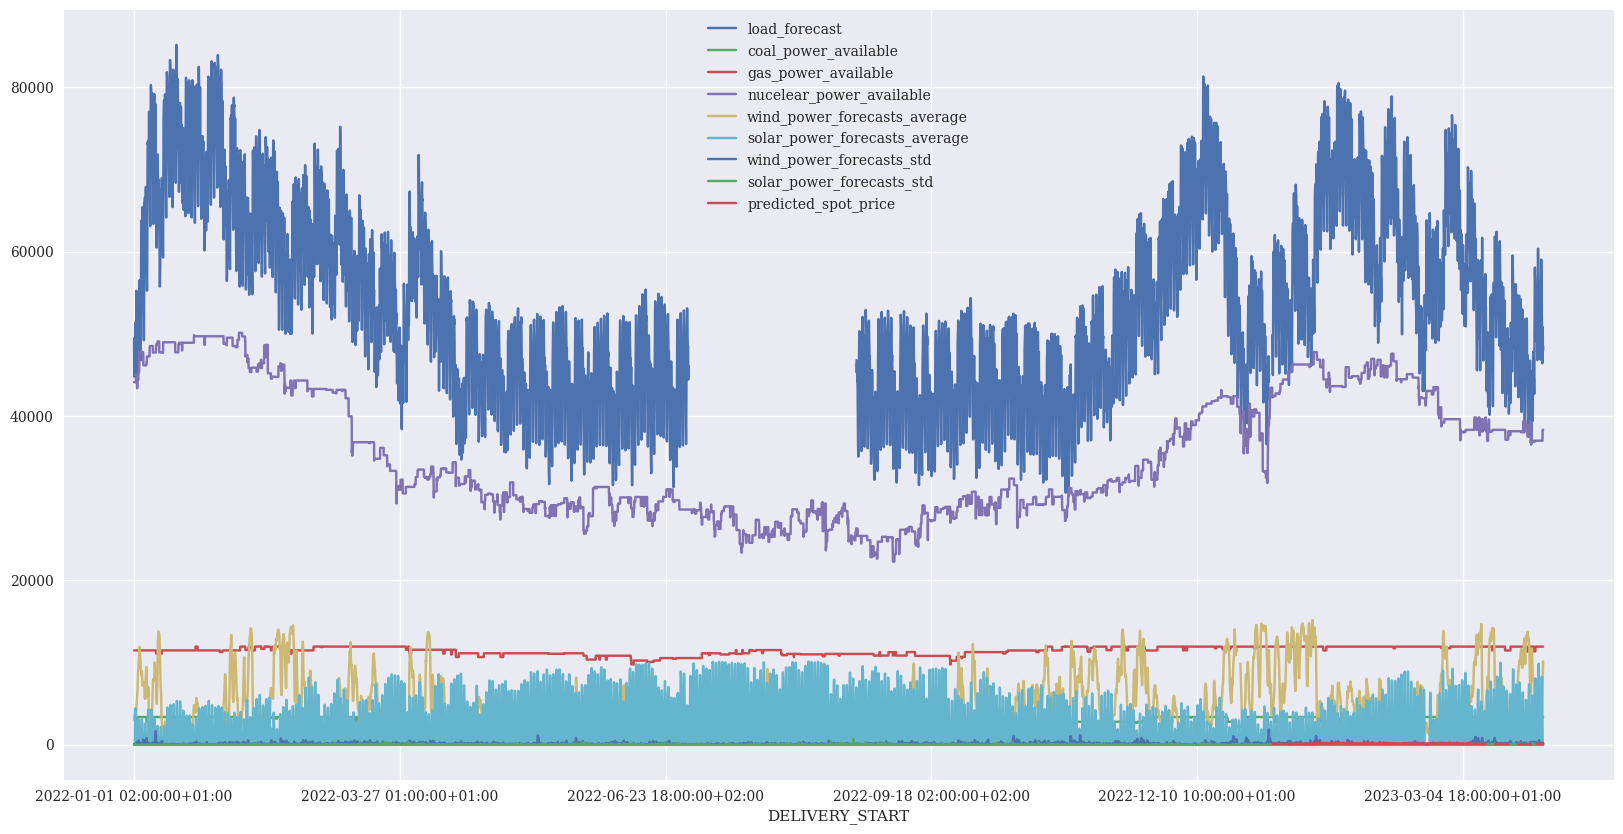

In [7]:
X.plot(figsize=(20,10))

array([[<AxesSubplot:title={'center':'load_forecast'}>,
        <AxesSubplot:title={'center':'coal_power_available'}>,
        <AxesSubplot:title={'center':'gas_power_available'}>],
       [<AxesSubplot:title={'center':'nucelear_power_available'}>,
        <AxesSubplot:title={'center':'wind_power_forecasts_average'}>,
        <AxesSubplot:title={'center':'solar_power_forecasts_average'}>],
       [<AxesSubplot:title={'center':'wind_power_forecasts_std'}>,
        <AxesSubplot:title={'center':'solar_power_forecasts_std'}>,
        <AxesSubplot:title={'center':'predicted_spot_price'}>]],
      dtype=object)

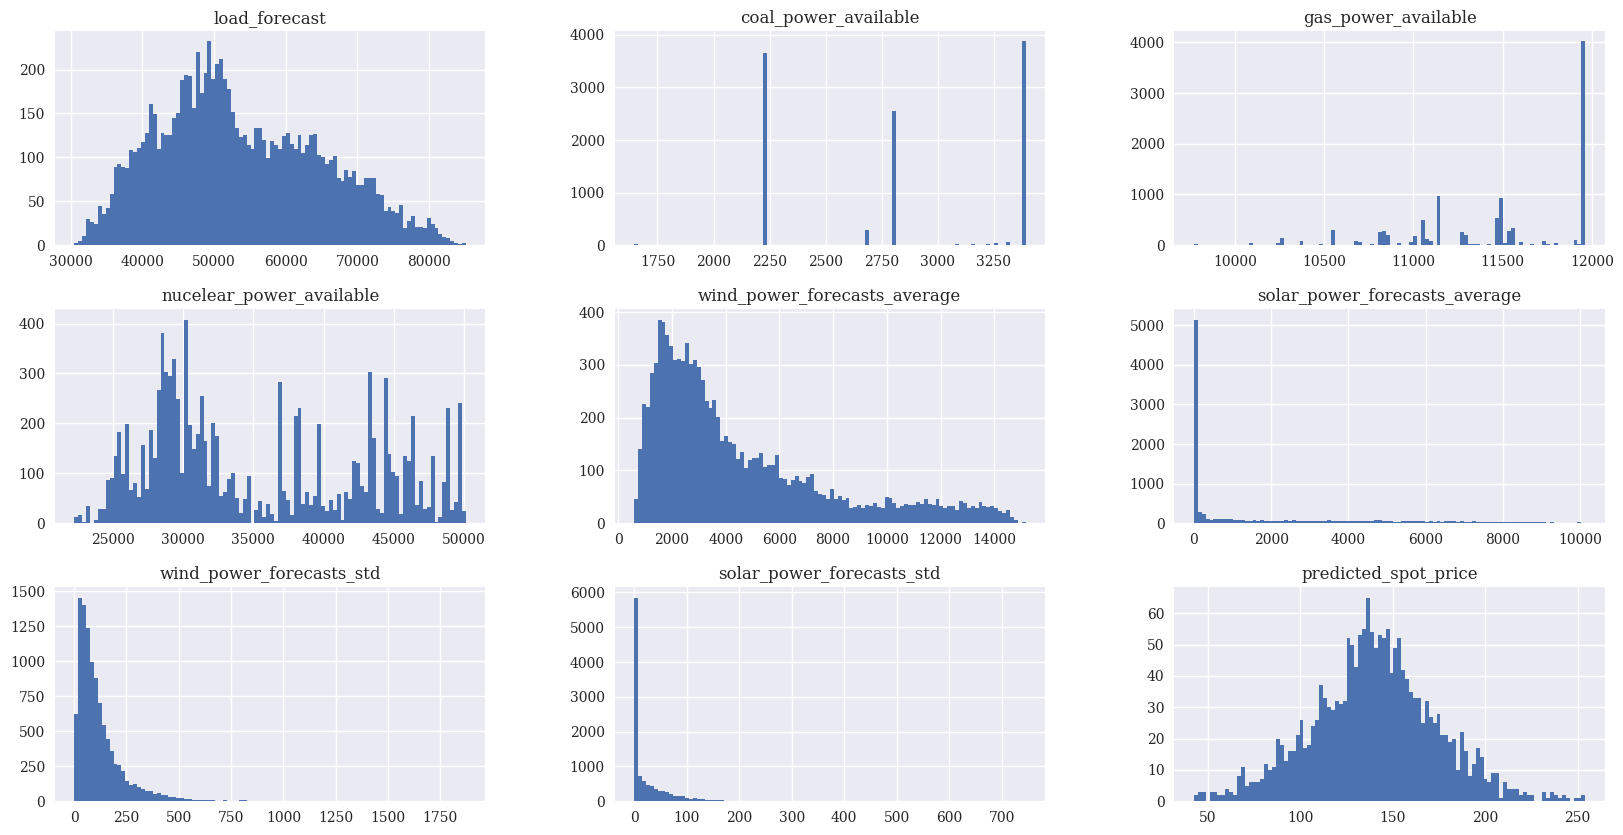

In [8]:
X.hist(figsize=(20,10), bins=100)

array([[<AxesSubplot:title={'center':'load_forecast'}>,
        <AxesSubplot:title={'center':'coal_power_available'}>,
        <AxesSubplot:title={'center':'gas_power_available'}>],
       [<AxesSubplot:title={'center':'nucelear_power_available'}>,
        <AxesSubplot:title={'center':'wind_power_forecasts_average'}>,
        <AxesSubplot:title={'center':'solar_power_forecasts_average'}>],
       [<AxesSubplot:title={'center':'wind_power_forecasts_std'}>,
        <AxesSubplot:title={'center':'solar_power_forecasts_std'}>,
        <AxesSubplot:title={'center':'predicted_spot_price'}>]],
      dtype=object)

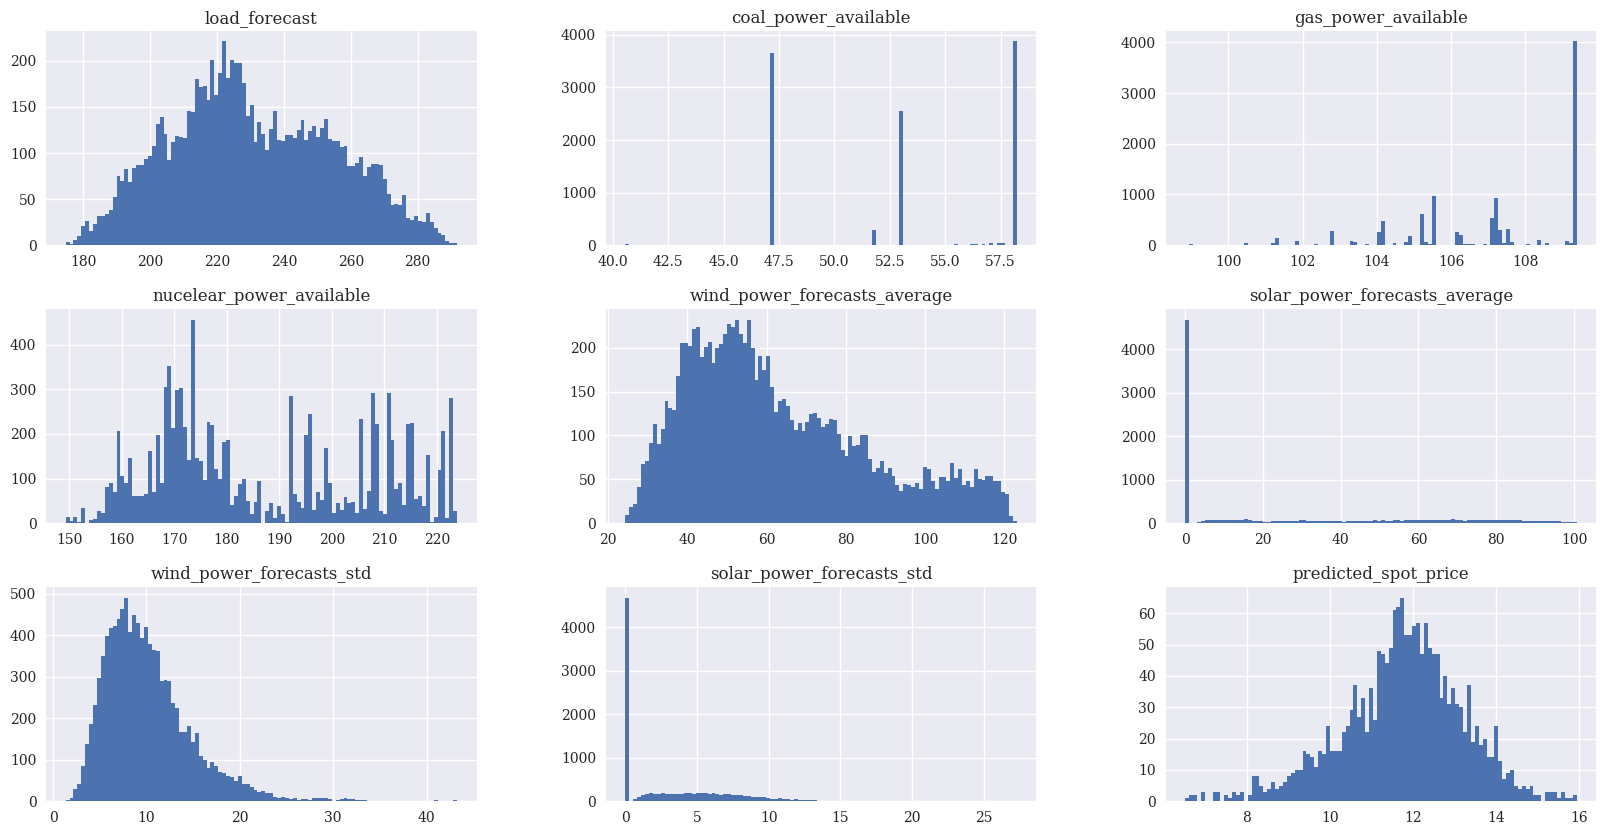

In [45]:
(X**0.5).hist(figsize=(20,10), bins=100)

In [10]:
(np.abs((X-X.mean())/(X.std()))>3).sum()

load_forecast                      0
coal_power_available               0
gas_power_available               20
nucelear_power_available           0
wind_power_forecasts_average      23
solar_power_forecasts_average      7
wind_power_forecasts_std         177
solar_power_forecasts_std        195
predicted_spot_price               7
dtype: int64

<AxesSubplot:xlabel='DELIVERY_START'>

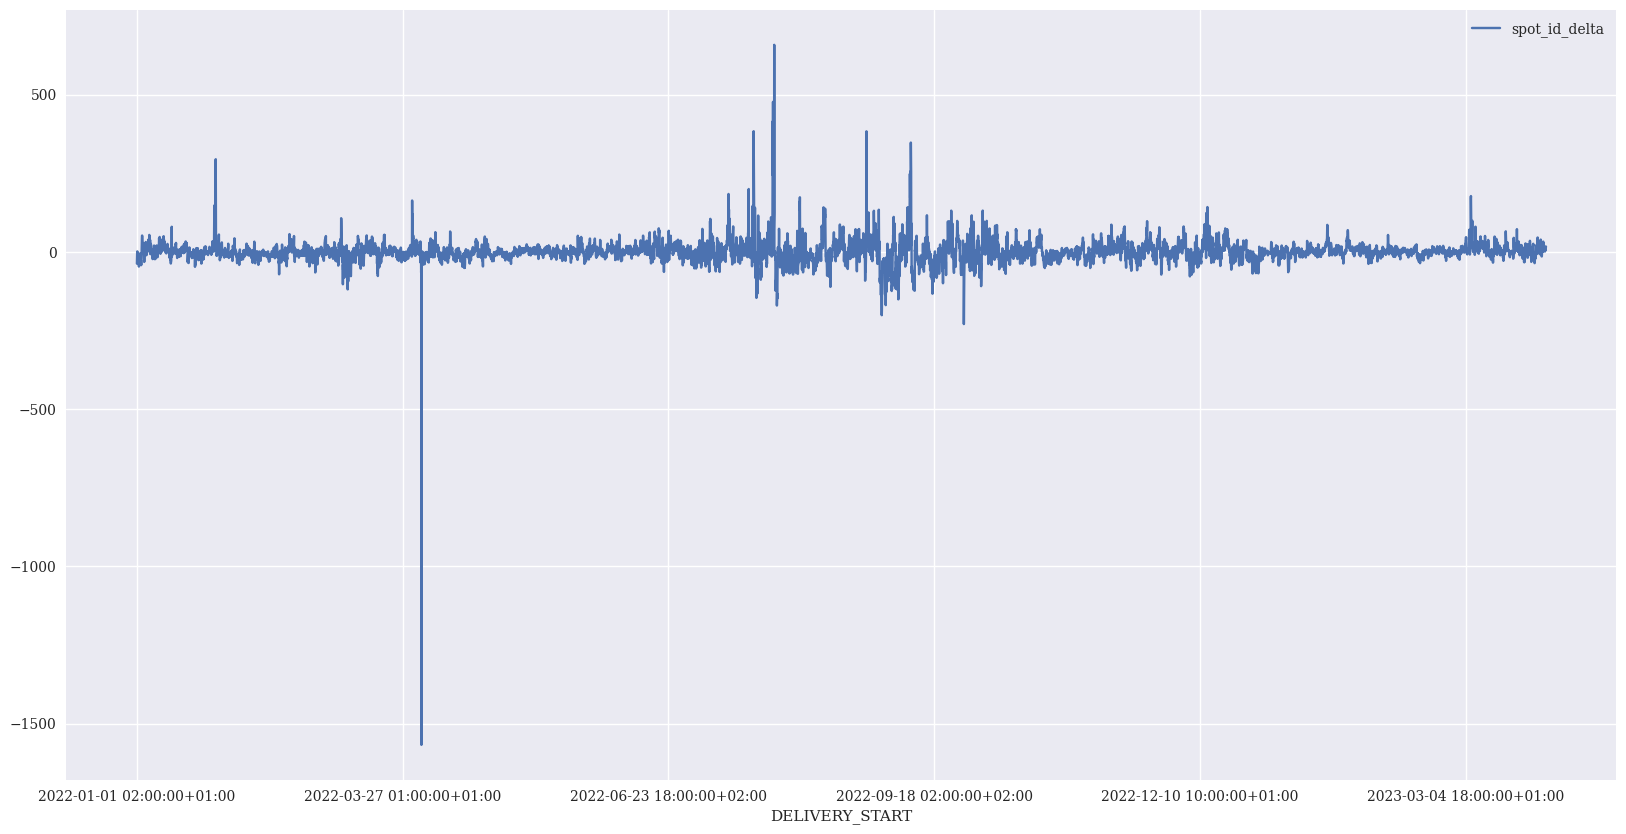

In [11]:
y.set_index('DELIVERY_START', inplace=True)
target = 'spot_id_delta'
y.plot(figsize=(20,10))

array([[<AxesSubplot:title={'center':'spot_id_delta'}>]], dtype=object)

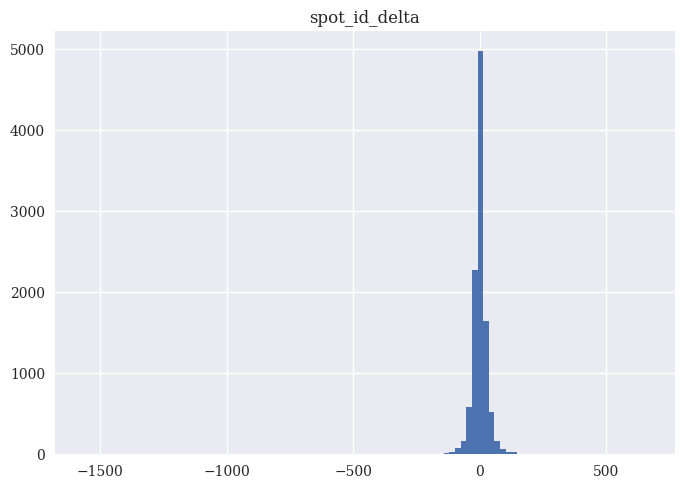

In [12]:
y.hist(bins=100)

In [13]:
z = (y-y.mean())/y.std()

In [14]:
(np.abs((y-y.mean())/(y.std()))>3).sum()

spot_id_delta    113
dtype: int64

In [17]:
data = pd.concat([X,y], axis=1)
corr = data.corr()
corr

,load_forecast,coal_power_available,gas_power_available,nucelear_power_available,wind_power_forecasts_average,solar_power_forecasts_average,wind_power_forecasts_std,solar_power_forecasts_std,predicted_spot_price,spot_id_delta
load_forecast,1.000000,0.592586,0.487420,0.790554,0.056690,-0.002045,0.007775,0.028725,0.848274,0.049428
coal_power_available,0.592586,1.000000,0.675499,0.773393,0.314780,-0.195945,0.110731,-0.058685,-0.136735,0.011937
gas_power_available,0.487420,0.675499,1.000000,0.608884,0.374664,-0.220792,0.151959,-0.081660,0.129213,-0.003882
nucelear_power_available,0.790554,0.773393,0.608884,1.000000,0.293377,-0.227825,0.090656,-0.110182,0.306091,0.002454
wind_power_forecasts_average,0.056690,0.314780,0.374664,0.293377,1.000000,-0.207682,0.345215,-0.099868,-0.399666,-0.020323
solar_power_forecasts_average,-0.002045,-0.195945,-0.220792,-0.227825,-0.207682,1.000000,-0.110381,0.631155,-0.034166,0.001465
wind_power_forecasts_std,0.007775,0.110731,0.151959,0.090656,0.345215,-0.110381,1.000000,0.011466,0.018240,0.007299
solar_power_forecasts_std,0.028725,-0.058685,-0.081660,-0.110182,-0.099868,0.631155,0.011466,1.000000,-0.047489,0.023814
predicted_spot_price,0.848274,-0.136735,0.129213,0.306091,-0.399666,-0.034166,0.018240,-0.047489,1.000000,0.158300
spot_id_delta,0.049428,0.011937,-0.003882,0.002454,-0.020323,0.001465,0.007299,0.023814,0.158300,1.000000


<AxesSubplot:xlabel='DELIVERY_START'>

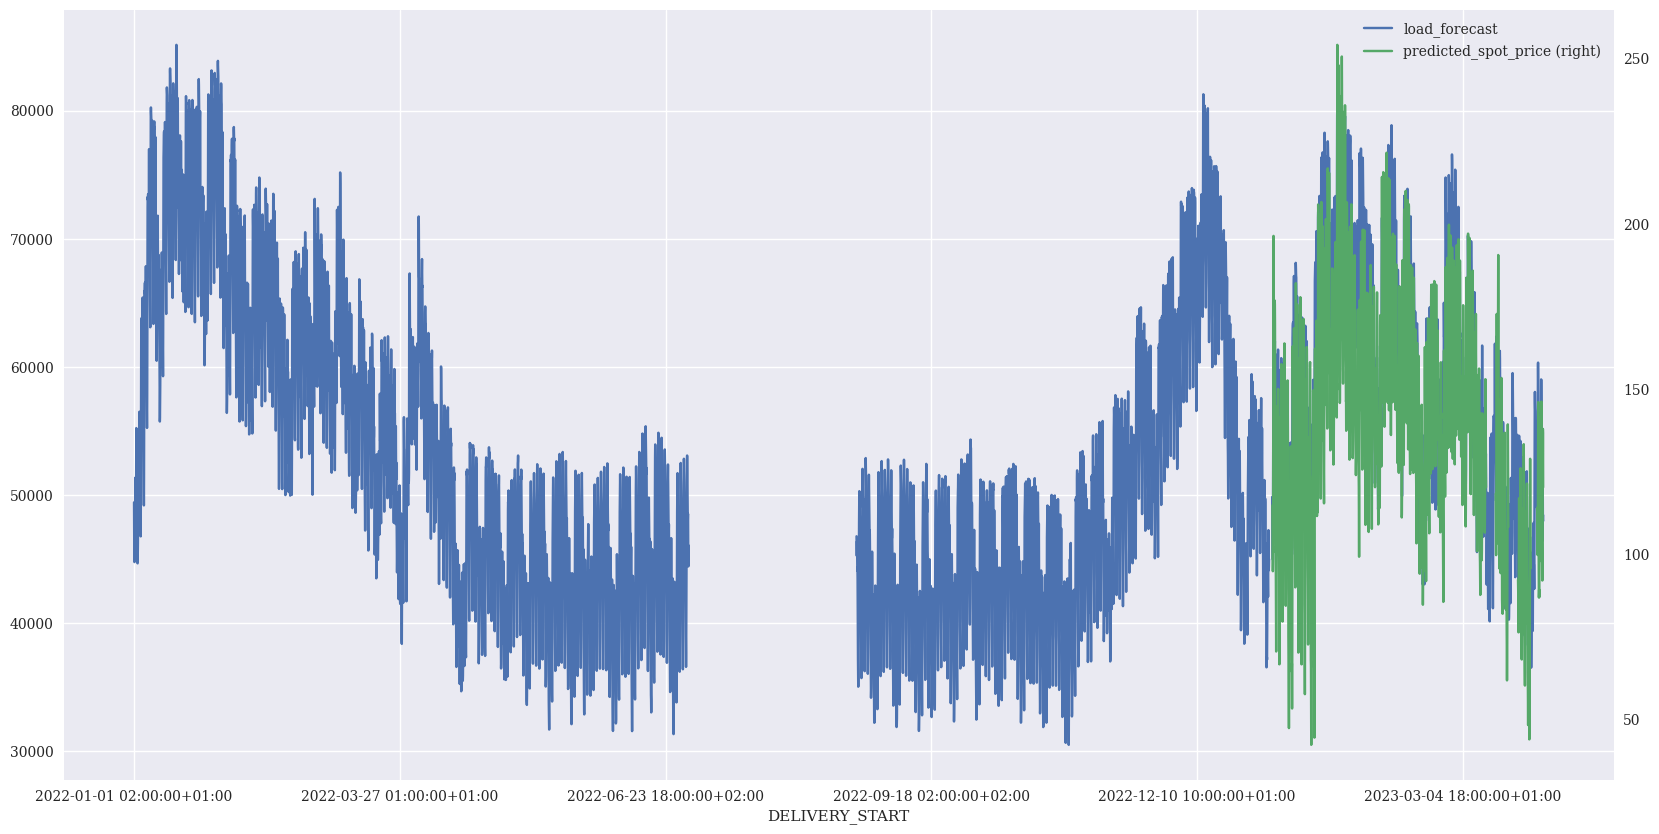

In [18]:
data[['load_forecast', 'predicted_spot_price']].plot(figsize=(20,10), secondary_y = 'predicted_spot_price')

<AxesSubplot:xlabel='DELIVERY_START'>

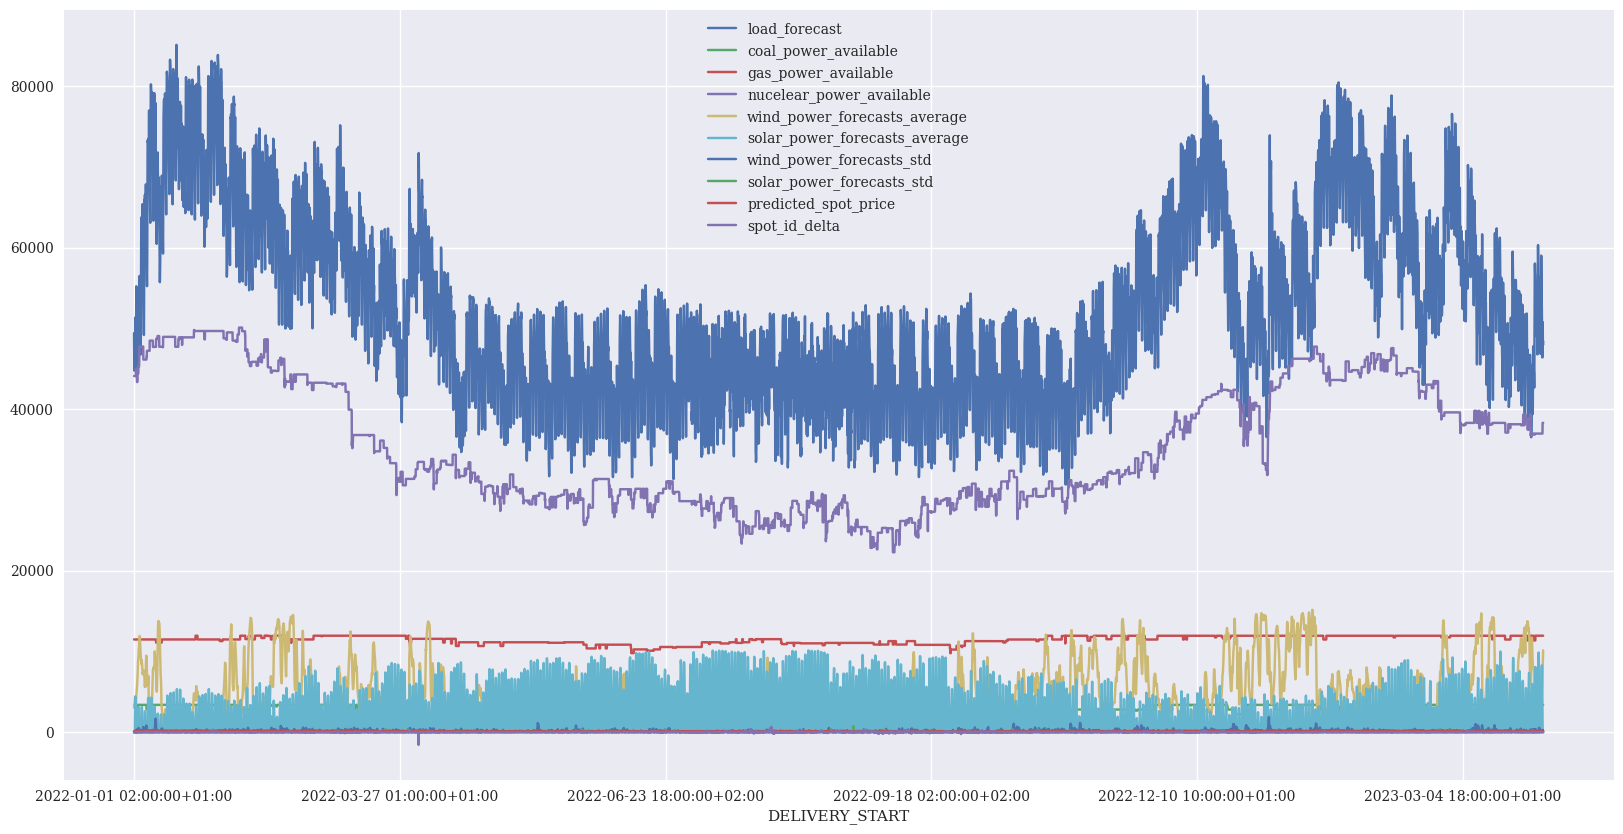

In [19]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
data= pd.DataFrame(imputer.fit_transform(data), index=data.index, columns=data.columns)
data.plot(figsize=(20,10))

<AxesSubplot:xlabel='DELIVERY_START'>

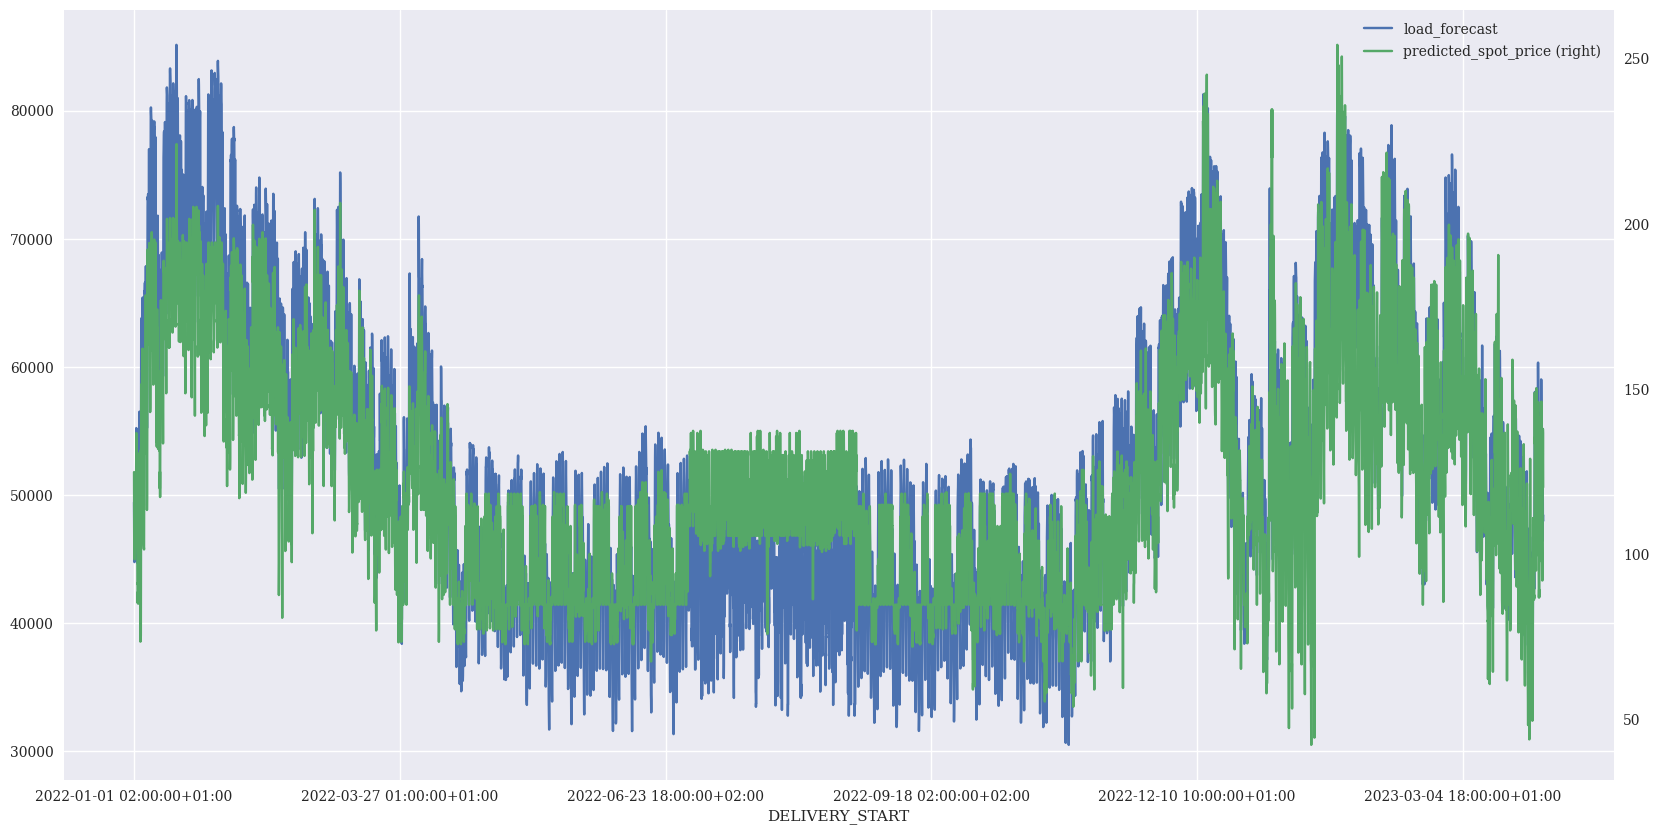

In [20]:
data[['load_forecast', 'predicted_spot_price']].plot(figsize=(20,10), secondary_y = 'predicted_spot_price')

array([[<AxesSubplot:title={'center':'wind_power_forecasts_average'}>,
        <AxesSubplot:title={'center':'solar_power_forecasts_average'}>],
       [<AxesSubplot:title={'center':'wind_power_forecasts_std'}>,
        <AxesSubplot:title={'center':'solar_power_forecasts_std'}>]],
      dtype=object)

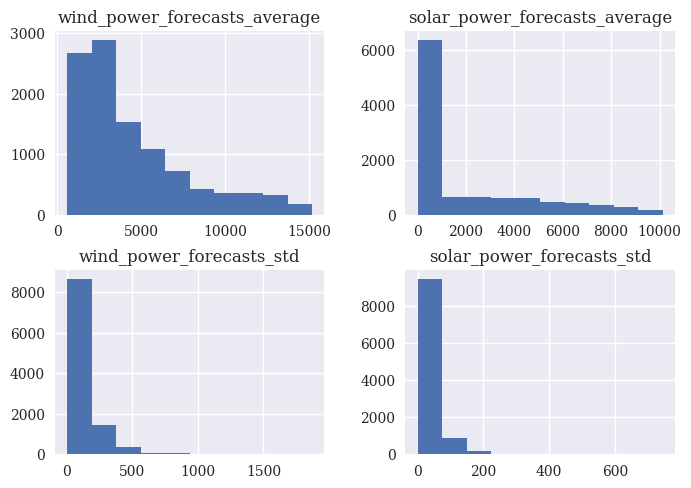

In [21]:
data[features[4:-1]].hist()

In [34]:
idx = pd.to_datetime(data.index)
idx[0]

C:\Users\alban\AppData\Local\Temp\ipykernel_25388\4045671621.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  idx = pd.to_datetime(data.index)


Timestamp('2022-01-01 02:00:00+0100', tz='UTC+01:00')

In [42]:
data.index.to_list()

['2022-01-01 02:00:00+01:00',
 '2022-01-01 03:00:00+01:00',
 '2022-01-01 04:00:00+01:00',
 '2022-01-01 05:00:00+01:00',
 '2022-01-01 06:00:00+01:00',
 '2022-01-01 07:00:00+01:00',
 '2022-01-01 08:00:00+01:00',
 '2022-01-01 09:00:00+01:00',
 '2022-01-01 10:00:00+01:00',
 '2022-01-01 11:00:00+01:00',
 '2022-01-01 12:00:00+01:00',
 '2022-01-01 13:00:00+01:00',
 '2022-01-01 14:00:00+01:00',
 '2022-01-01 15:00:00+01:00',
 '2022-01-01 16:00:00+01:00',
 '2022-01-01 17:00:00+01:00',
 '2022-01-01 18:00:00+01:00',
 '2022-01-01 19:00:00+01:00',
 '2022-01-01 20:00:00+01:00',
 '2022-01-01 21:00:00+01:00',
 '2022-01-01 22:00:00+01:00',
 '2022-01-01 23:00:00+01:00',
 '2022-01-02 00:00:00+01:00',
 '2022-01-02 01:00:00+01:00',
 '2022-01-02 02:00:00+01:00',
 '2022-01-02 03:00:00+01:00',
 '2022-01-02 04:00:00+01:00',
 '2022-01-02 05:00:00+01:00',
 '2022-01-02 06:00:00+01:00',
 '2022-01-02 07:00:00+01:00',
 '2022-01-02 08:00:00+01:00',
 '2022-01-02 09:00:00+01:00',
 '2022-01-02 10:00:00+01:00',
 '2022-01-

In [40]:
list_dates = list(map(lambda i: data.index[i], range(len(data))))
list_dates

['2022-01-01 02:00:00+01:00',
 '2022-01-01 03:00:00+01:00',
 '2022-01-01 04:00:00+01:00',
 '2022-01-01 05:00:00+01:00',
 '2022-01-01 06:00:00+01:00',
 '2022-01-01 07:00:00+01:00',
 '2022-01-01 08:00:00+01:00',
 '2022-01-01 09:00:00+01:00',
 '2022-01-01 10:00:00+01:00',
 '2022-01-01 11:00:00+01:00',
 '2022-01-01 12:00:00+01:00',
 '2022-01-01 13:00:00+01:00',
 '2022-01-01 14:00:00+01:00',
 '2022-01-01 15:00:00+01:00',
 '2022-01-01 16:00:00+01:00',
 '2022-01-01 17:00:00+01:00',
 '2022-01-01 18:00:00+01:00',
 '2022-01-01 19:00:00+01:00',
 '2022-01-01 20:00:00+01:00',
 '2022-01-01 21:00:00+01:00',
 '2022-01-01 22:00:00+01:00',
 '2022-01-01 23:00:00+01:00',
 '2022-01-02 00:00:00+01:00',
 '2022-01-02 01:00:00+01:00',
 '2022-01-02 02:00:00+01:00',
 '2022-01-02 03:00:00+01:00',
 '2022-01-02 04:00:00+01:00',
 '2022-01-02 05:00:00+01:00',
 '2022-01-02 06:00:00+01:00',
 '2022-01-02 07:00:00+01:00',
 '2022-01-02 08:00:00+01:00',
 '2022-01-02 09:00:00+01:00',
 '2022-01-02 10:00:00+01:00',
 '2022-01-

In [39]:
days_delta = pd.concat([pd.Series(pd.Series(list_dates).unique()), pd.Series(pd.to_datetime(list(list_dates)).unique().diff())], axis=1)
days_delta[1].value_counts()

ValueError: Tz-aware datetime.datetime cannot be converted to datetime64 unless utc=True, at position 2001

In [20]:
24*4+2*2+40+12+46+72

270

In [21]:
len(data)

10605

In [22]:
data

,load_forecast,coal_power_available,gas_power_available,nucelear_power_available,wind_power_forecasts_average,solar_power_forecasts_average,wind_power_forecasts_std,solar_power_forecasts_std,predicted_spot_price,spot_id_delta
DELIVERY_START,,,,,,,,,,
2022-01-01 02:00:00+01:00,49439.0,3386.0,11487.0,44118.0,3035.0,0.0,79.248348,0.000000,124.924,-36.874770
2022-01-01 03:00:00+01:00,46511.0,3386.0,11487.0,44118.0,3143.0,0.0,61.776532,0.000000,106.558,-12.643588
2022-01-01 04:00:00+01:00,45158.0,3386.0,11487.0,44118.0,3288.0,0.0,44.291112,0.000000,102.774,-1.950193
2022-01-01 05:00:00+01:00,44779.0,3386.0,11487.0,44118.0,3447.0,0.0,36.127588,0.000000,99.964,1.938272
2022-01-01 06:00:00+01:00,45284.0,3386.0,11487.0,44118.0,3679.0,0.0,30.983023,0.000000,98.566,0.199907
...,...,...,...,...,...,...,...,...,...,...
2023-03-29 19:00:00+02:00,50814.0,3386.0,11952.0,38320.0,7552.0,651.0,247.408490,7.821622,108.110,6.029303
2023-03-29 20:00:00+02:00,50628.0,3386.0,11952.0,38320.0,8338.0,109.0,155.795012,2.534054,125.660,13.576177
2023-03-29 21:00:00+02:00,48201.0,3386.0,11952.0,38320.0,9115.0,0.0,126.884684,0.000000,138.010,17.478945


In [23]:
data.index = data.index.astype('str')

In [26]:
start_date = data.index[0][:13]
end_date = data.index[-1][:13]

tab = pd.DataFrame(index=pd.date_range(start=start_date, end=end_date, freq="h", tz="Europe/Paris"))
tab.index.name = 'DELIVERY_START'
#data.index = pd.to_datetime(data.index)
tab.index = tab.index.astype('str')
data = pd.merge(tab, data, on ='DELIVERY_START', how='left')

In [27]:
data.isna().sum()

load_forecast                    264
coal_power_available             264
gas_power_available              264
nucelear_power_available         264
wind_power_forecasts_average     264
solar_power_forecasts_average    264
wind_power_forecasts_std         264
solar_power_forecasts_std        264
predicted_spot_price             264
spot_id_delta                    264
dtype: int64

array([[<AxesSubplot:title={'center':'wind_power_forecasts_average'}>,
        <AxesSubplot:title={'center':'solar_power_forecasts_average'}>],
       [<AxesSubplot:title={'center':'wind_power_forecasts_std'}>,
        <AxesSubplot:title={'center':'solar_power_forecasts_std'}>]],
      dtype=object)

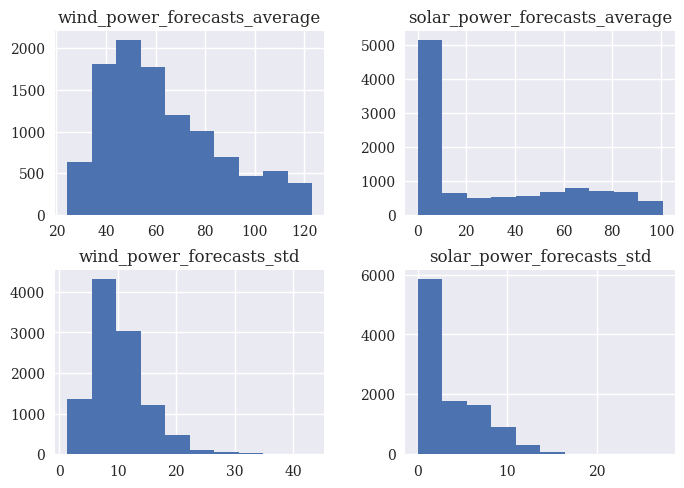

In [17]:
((data[features[4:-1]])**(1/2)).hist()

<AxesSubplot:xlabel='DELIVERY_START'>

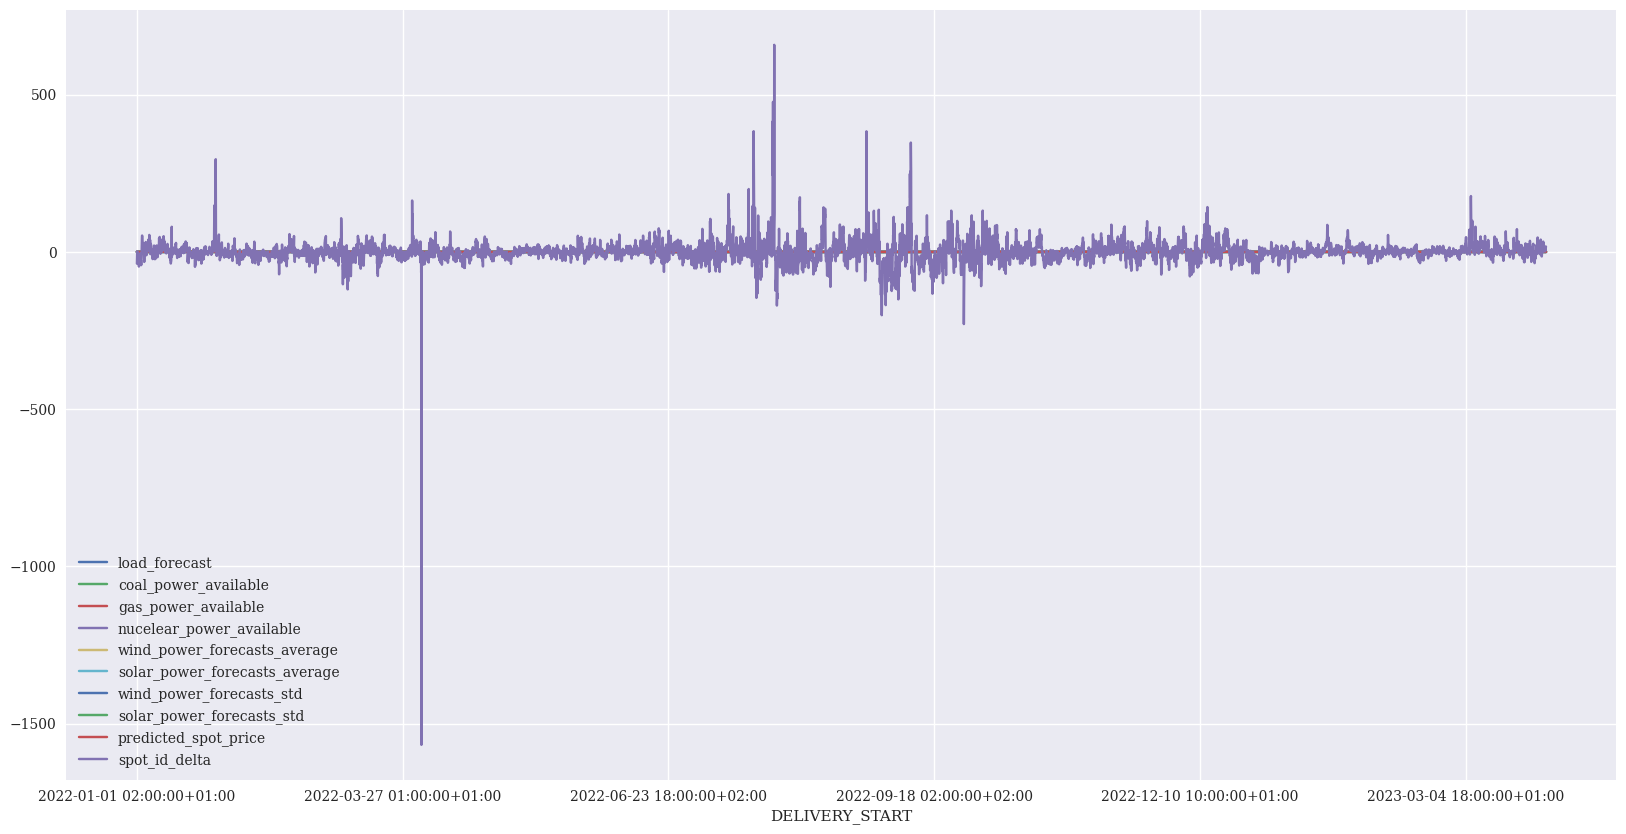

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = pd.concat([pd.DataFrame(scaler.fit_transform(data[features]), index=data.index, columns=data[features].columns), data[target]], axis=1)
data.plot(figsize=(20,10))

In [21]:
data.to_csv('data.csv')

In [29]:
data.describe()

,load_forecast,coal_power_available,gas_power_available,nucelear_power_available,wind_power_forecasts_average,solar_power_forecasts_average,wind_power_forecasts_std,solar_power_forecasts_std,predicted_spot_price,spot_id_delta
count,10605.000000,10605.000000,10605.000000,10605.000000,10605.000000,10605.000000,10605.000000,10605.000000,10605.000000,10605.000000
mean,0.403673,0.672622,0.772186,0.470866,0.392571,0.287690,0.210449,0.119238,0.370418,0.943358
std,0.204509,0.283733,0.220510,0.273732,0.233927,0.326578,0.111862,0.138945,0.158725,38.093819
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1567.353547
25%,0.248984,0.332378,0.624886,0.241405,0.210722,0.000000,0.131141,0.000000,0.242537,-11.934152
50%,0.364452,0.664756,0.783045,0.365880,0.337286,0.122513,0.190224,0.068958,0.340851,0.059125
75%,0.552297,0.997135,0.991796,0.746129,0.535716,0.587719,0.265388,0.216864,0.476083,12.190489
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,658.961329


In [21]:
features[:-1]

Index(['load_forecast', 'coal_power_available', 'gas_power_available',
       'nucelear_power_available', 'wind_power_forecasts_average',
       'solar_power_forecasts_average', 'wind_power_forecasts_std',
       'solar_power_forecasts_std'],
      dtype='object')

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[features[:-1]], data[target], random_state=42, test_size=0.1, shuffle=False)

In [25]:
def acc(outputs, y):
    dir_outputs = pd.Series(outputs).apply(lambda x: 1 if x>0 else -1)
    dir_y = pd.Series(y).apply(lambda x: 1 if x>0 else -1)
    return sum(dir_y.values == dir_outputs.values)/len(outputs)

def weighted_acc(outputs, y):
    dir_outputs = pd.Series(outputs).apply(lambda x: 1 if x>0 else -1) #np.where(outputs>0, 1, -1)
    dir_y = pd.Series(y).apply(lambda x: 1 if x>0 else -1) #np.where(y>0, 1, -1)
    indic = (dir_y.values == dir_outputs.values)*1
    abs_dev = np.abs(y - outputs)
    return np.sum(abs_dev.values*indic)/np.sum(abs_dev.values)

from sklearn.metrics import make_scorer
fscorer = make_scorer(weighted_acc)


In [4]:
import tensorflow

ModuleNotFoundError: No module named 'tensorflow'

In [24]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
for i, (train_index, test_index) in enumerate(kf.split(X_train, y_train)):
    print(f"Fold {i}:")
    print(f"  Train: len={len(train_index)}, index={train_index}")
    print(f"  Test:  len={len(test_index)}, index={test_index}")


Fold 0:
  Train: len=7635, index=[1909 1910 1911 ... 9541 9542 9543]
  Test:  len=1909, index=[   0    1    2 ... 1906 1907 1908]
Fold 1:
  Train: len=7635, index=[   0    1    2 ... 9541 9542 9543]
  Test:  len=1909, index=[1909 1910 1911 ... 3815 3816 3817]
Fold 2:
  Train: len=7635, index=[   0    1    2 ... 9541 9542 9543]
  Test:  len=1909, index=[3818 3819 3820 ... 5724 5725 5726]
Fold 3:
  Train: len=7635, index=[   0    1    2 ... 9541 9542 9543]
  Test:  len=1909, index=[5727 5728 5729 ... 7633 7634 7635]
Fold 4:
  Train: len=7636, index=[   0    1    2 ... 7633 7634 7635]
  Test:  len=1908, index=[7636 7637 7638 ... 9541 9542 9543]


In [25]:
from itertools import product
from sklearn.ensemble import RandomForestRegressor

def set_model(model: str, params: dict):
    if model == 'random_forest':
        model = RandomForestRegressor(**params,
                                      random_state=42)
    return model

def compute_hyperopt(params_grid, X_train, y_train, X_test, y_test, n_iter=None):
    """
    Combinations of all hyper parameters
    """
    params, values = zip(*params_grid.items())
    product_params = list(product(*values))
    dict_param = dict(map(lambda i: (i, dict(zip(params, product_params[i]))),
                                    range(len(product_params))))
    """
    Defining max number of hyperoptimization trials
    """
    if n_iter is not None:
        random.seed(42)
        random_key = random.sample(list(dict_param), n_iter)
    else:
        random_key = list(range(len(product_params)))
    
    """
    Instantiate DF to save the results
    """
    results = pd.DataFrame(columns=['mean_test_acc', 'std_test_acc', 'sharpe'] + list(params),
                        index=range(len(dict_param)))
    best_val_score = -np.inf
    best_params = None
        
    """
    Finding best hyperparameters over number of trials/combination
    Sorted accorded minimum validation rmse
    Saving values for each trial of hyperparameters set
    """

    for i, key in enumerate(random_key):
        params = dict_param[key]
        model = set_model('random_forest', params)
        val_scores = []
        for _, (train_index, val_index) in enumerate(kf.split(X_train, y_train)):
            model.fit(X_train.iloc[train_index], y_train.iloc[train_index])
            outputs = model.predict(X_train.iloc[val_index])
            val_score = weighted_acc(outputs, y_train.iloc[val_index])
            val_scores.append(val_score)
        mean_score = np.mean(val_scores)
        std_score = np.std(val_scores)
        sharpe_score = mean_score/std_score
        if sharpe_score > best_val_score:
            best_val_score = sharpe_score
            best_params = params
        results.iloc[i] = [mean_score, std_score, sharpe_score] + list(params.values())
    
    results = results.sort_values('sharpe', ascending=False)[:5]
    print('Top 5 models leading to the max Sharpe on scaled testing set: ')
    print(results)

    model = set_model('random_forest', best_params)
    model.fit(X_train, y_train)
    outputs = model.predict(X_test)
    score = weighted_acc(outputs, y_test)
    print(f'TEST Weighted Accuracy = {score}')
    print(f'TEST Accuracy = {acc(outputs, y_test)}')

In [26]:
param_grid = {
    'n_estimators': [100],
    'max_features': [0.25, 0.5],
}
compute_hyperopt(param_grid, X_train, y_train, X_test, y_test)

Top 5 models leading to the max Sharpe on scaled testing set: 
  mean_test_acc std_test_acc     sharpe n_estimators max_features
1      0.342971     0.032015  10.712956          100          0.5
0      0.357705      0.03068  11.659157          100         0.25
TEST Weighted Accuracy = 0.29452838558343375
TEST Accuracy = 0.4590009425070688


In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
reg = RandomForestRegressor(max_depth=5, max_features=0.75)
for i, (train_index, val_index) in enumerate(kf.split(X_train, y_train)):
    reg.fit(X_train.iloc[train_index], y_train.iloc[train_index])
    outputs = reg.predict(X_train.iloc[val_index])
    print(f'Weighted Accuracy = {weighted_acc(outputs, y_train.iloc[val_index])}')
    print(f'Accuracy = {acc(outputs, y_train.iloc[val_index])}')

Weighted Accuracy = 0.3975057365072474
Accuracy = 0.44421162912519646
Weighted Accuracy = 0.36277076538025077
Accuracy = 0.500785751702462
Weighted Accuracy = 0.35083083130027976
Accuracy = 0.4897852278679937
Weighted Accuracy = 0.4609905832494632
Accuracy = 0.4814038763750655
Weighted Accuracy = 0.43411331460409286
Accuracy = 0.4937106918238994


In [28]:
def print_res(grids, params):
    hp_name = list(grids.cv_results_['params'][0].keys())
    results = pd.DataFrame(columns=['mean_test_acc', 'std_test_acc']+hp_name, index=range(len(grids.cv_results_["mean_test_score"])))
    results['mean_test_acc']=grids.cv_results_["mean_test_score"]
    results['std_test_acc']=grids.cv_results_["std_test_score"]
    results['sharpe_test_acc'] = results['mean_test_acc']/results['std_test_acc']
    results[hp_name] = [list(params.values()) for params in grids.cv_results_["params"]]
    results = results.sort_values('sharpe_test_acc', ascending=False)[:5]
    print(results)

def print_feat_imp(grids, features):
    f_i = pd.DataFrame(grids.best_estimator_.feature_importances_, index=features[:-1])
    f_i = f_i[f_i[0]>0.01].sort_values([0])
    f_i.plot.barh(legend=False, title='Features importance')

Fitting 5 folds for each of 2 candidates, totalling 10 fits
   mean_test_acc  std_test_acc  max_features  n_estimators  sharpe_test_acc
0       0.357705      0.030680          0.25         100.0        11.659157
1       0.342971      0.032015          0.50         100.0        10.712956
TEST Weighted Accuracy = 0.29452838558343375
TEST Accuracy = 0.4590009425070688


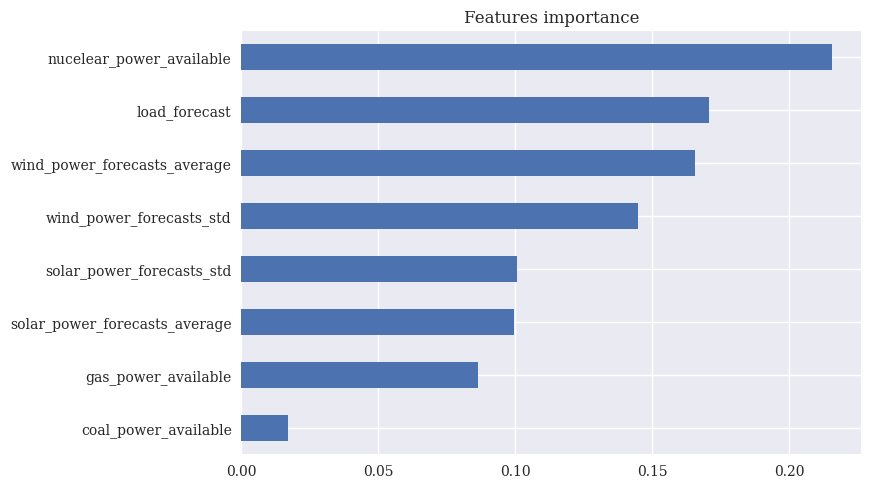

In [29]:

from sklearn.model_selection import GridSearchCV
reg = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': [0.25, 0.5, 0.75],
    'max_samples': [0.25, 0.5, 0.75],
}
param_grid = {
    'n_estimators': [100],
    'max_features': [0.25, 0.5],
}
grids = GridSearchCV(reg, param_grid, cv=KFold(n_splits=5), scoring=fscorer, n_jobs=-1, verbose=1)
grids.fit(X_train, y_train)
print_res(grids, param_grid)
print_feat_imp(grids, features)
print(f'TEST Weighted Accuracy = {weighted_acc(grids.best_estimator_.predict(X_test), y_test)}')
print(f'TEST Accuracy = {acc(grids.best_estimator_.predict(X_test), y_test)}')

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
     mean_test_acc  std_test_acc  learning_rate  max_depth  min_samples_split  \
371       0.354356      0.014352          1.000        4.0               0.10   
89        0.418973      0.018576          0.001        8.0               0.01   
107       0.423117      0.020579          0.001        8.0               0.10   
303       0.352610      0.017690          0.100        8.0               0.01   
163       0.401886      0.022189          0.010        6.0               0.01   

     n_estimators  subsample  sharpe_test_acc  
371         100.0       0.75        24.690433  
89          300.0       0.75        22.554611  
107         300.0       0.75        20.560526  
303         300.0       0.25        19.933010  
163         100.0       0.50        18.111841  
TEST Weighted Accuracy = 0.34375356649760846
TEST Accuracy = 0.46182846371347785


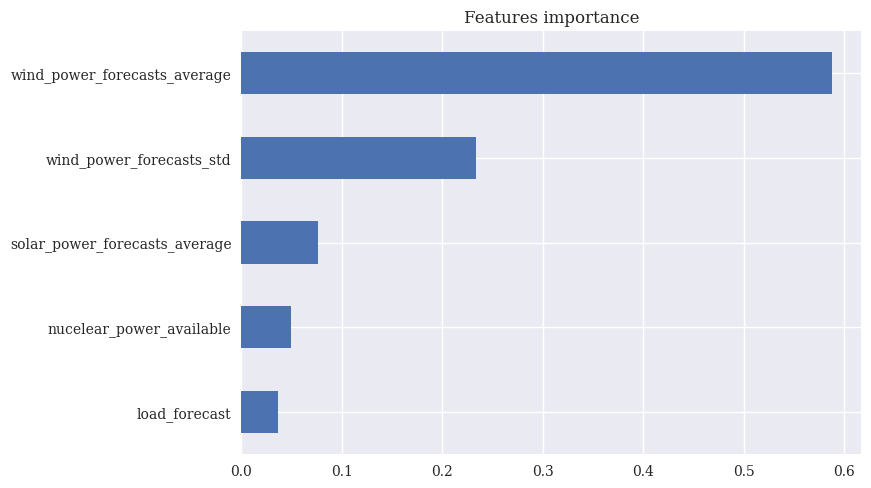

In [34]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
reg = GradientBoostingRegressor(random_state=42)
param_grid = {
    'max_depth': [3, 4, 6, 8],
    'min_samples_split': [0.01, 0.05, 0.1],
    'subsample': [0.25, 0.5, 0.75],
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.001, 0.01, 0.1, 1],
}
grids = GridSearchCV(reg, param_grid, cv=KFold(n_splits=5), scoring=fscorer, n_jobs=-1, verbose=1)
grids.fit(X_train, y_train)
print_res(grids, param_grid)
print_feat_imp(grids, features)
print(f'TEST Weighted Accuracy = {weighted_acc(grids.best_estimator_.predict(X_test), y_test)}')
print(f'TEST Accuracy = {acc(grids.best_estimator_.predict(X_test), y_test)}')

In [35]:
pd.Series(grids.cv_results_["mean_test_score"]).sort_values()

370    0.331237
358    0.334830
355    0.335897
352    0.335905
373    0.335976
         ...   
32     0.452749
49     0.453140
50     0.453204
41     0.453578
357    0.458459
Length: 432, dtype: float64

In [ ]:
param_grid = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'max_features': [0.25, 0.5, 0.75],
    'max_samples': [0.25, 0.5, 0.75],
}